In [1]:
import pandas as pd
import numpy as np
from glob import glob
import pickle
from collections import Counter

In [2]:
session_20_lst = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20',
               '21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40']
script_20_lst = ['script01','script02','script03','script04','script05','script06']
sex_lst = ['F', 'M']


In [3]:
sid_20_lst = []
sid_20_dict = {}
anno_20_df = pd.DataFrame()
for session in session_20_lst:
    df = pd.read_csv(f'../KEMDy20/annotation/Sess{session}_eval.csv', skiprows=1)
    df.rename(columns={' .1':'Segment ID'}, inplace=True)
    anno_20_df = anno_20_df.append(df)
    sid_20_dict[session] = df['Segment ID']
    sid_20_lst.extend(list(df['Segment ID']))
    

anno_20_df.reset_index(drop=True, inplace=True)
sid_20_lst[:3]

/tmp/ipykernel_2188448/2261264006.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anno_20_df = anno_20_df.append(df)
/tmp/ipykernel_2188448/2261264006.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anno_20_df = anno_20_df.append(df)
/tmp/ipykernel_2188448/2261264006.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anno_20_df = anno_20_df.append(df)
/tmp/ipykernel_2188448/2261264006.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anno_20_df = anno_20_df.append(df)
/tmp/ipykernel_2188448/2261264006.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

['Sess01_script01_User002M_001',
 'Sess01_script01_User002M_002',
 'Sess01_script01_User002M_003']

In [5]:
sid_20_counter = Counter(sid_20_lst)
[k for k in sid_20_counter if sid_20_counter.get(k) > 1]

[]

In [6]:
emotion_20_eval_df = anno_20_df[['Emotion.1','Emotion.2','Emotion.3','Emotion.4','Emotion.5','Emotion.6','Emotion.7','Emotion.8','Emotion.9','Emotion.10']]
valence_20_eval_df = anno_20_df[['Valence.1','Valence.2','Valence.3','Valence.4','Valence.5','Valence.6','Valence.7','Valence.8','Valence.9','Valence.10']]
arousal_20_eval_df = anno_20_df[['Arousal.1','Arousal.2','Arousal.3','Arousal.4','Arousal.5','Arousal.6','Arousal.7','Arousal.8','Arousal.9','Arousal.10']]

In [7]:
from collections import Counter

annot_target = []
for i in range(len(emotion_20_eval_df)):
    score_table = {'neutral': 0, 'happy': 0, 'surprise':0, 'disgust': 0, 'angry': 0, 'sad':0, 'fear': 0}
    i_of_tsdata = Counter(emotion_20_eval_df.iloc[i])
    for emotion in i_of_tsdata.keys():
        score_table[emotion] += i_of_tsdata[emotion]
    annot_target.append(list(score_table.values()))
annot_target[:3]

[[10, 0, 0, 0, 0, 0, 0], [10, 0, 0, 0, 0, 0, 0], [10, 0, 0, 0, 0, 0, 0]]

In [8]:
val_target = []
for i in range(len(valence_20_eval_df)):
    score_table = {1: 0, 2: 0, 3:0, 4: 0, 5: 0}
    i_of_tsdata = Counter(valence_20_eval_df.iloc[i])
    for val in i_of_tsdata.keys():
        score_table[val] += i_of_tsdata[val]
    val_target.append(list(score_table.values()))
val_target[:3]

[[0, 0, 6, 4, 0], [0, 0, 9, 1, 0], [0, 0, 9, 1, 0]]

In [9]:
arou_target = []
for i in range(len(arousal_20_eval_df)):
    score_table = {1: 0, 2: 0, 3:0, 4: 0, 5: 0}
    i_of_tsdata = Counter(arousal_20_eval_df.iloc[i])
    for arou in i_of_tsdata.keys():
        score_table[arou] += i_of_tsdata[arou]
    arou_target.append(list(score_table.values()))
arou_target[:3]

[[0, 1, 9, 0, 0], [0, 1, 9, 0, 0], [0, 0, 10, 0, 0]]

In [10]:
import numpy as np
import pandas as pd

annot_target = pd.Series(annot_target)
val_target = pd.Series(val_target)
arou_target = pd.Series(arou_target)

In [11]:
annotation_20 = anno_20_df.drop(columns=list(anno_20_df.columns[:3]))
annotation_20 = annotation_20.drop(columns=list(anno_20_df.columns[7:]))
annotation_20['emotion_vector'] = annot_target
annotation_20['valence_vector'] = val_target
annotation_20['arousal_vector'] = arou_target

In [12]:
annotation_20

,Segment ID,Emotion,Valence,Arousal,emotion_vector,valence_vector,arousal_vector
0,Sess01_script01_User002M_001,neutral,3.4,2.9,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 6, 4, 0]","[0, 1, 9, 0, 0]"
1,Sess01_script01_User002M_002,neutral,3.1,2.9,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 9, 1, 0]","[0, 1, 9, 0, 0]"
2,Sess01_script01_User002M_003,neutral,3.1,3.0,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 9, 1, 0]","[0, 0, 10, 0, 0]"
3,Sess01_script01_User002M_004,neutral,3.7,3.1,"[9, 1, 0, 0, 0, 0, 0]","[0, 0, 3, 7, 0]","[0, 0, 9, 1, 0]"
4,Sess01_script01_User001F_001,neutral,3.8,2.8,"[6, 4, 0, 0, 0, 0, 0]","[0, 0, 3, 6, 1]","[0, 2, 8, 0, 0]"
...,...,...,...,...,...,...,...
13457,Sess40_script06_User079F_043,neutral,3.0,3.5,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 10, 0, 0]","[0, 0, 5, 5, 0]"
13458,Sess40_script06_User079F_044,neutral,2.9,3.1,"[10, 0, 0, 0, 0, 0, 0]","[0, 1, 9, 0, 0]","[0, 1, 7, 2, 0]"
13459,Sess40_script06_User079F_045,neutral,2.6,3.6,"[9, 0, 0, 0, 0, 0, 1]","[0, 4, 6, 0, 0]","[0, 0, 4, 6, 0]"
13460,Sess40_script06_User079F_046,neutral,2.7,3.3,"[8, 0, 1, 1, 0, 0, 0]","[0, 3, 7, 0, 0]","[0, 0, 7, 3, 0]"


In [13]:
from tqdm import tqdm 
import csv
eda_20_dict = {}
temp_20_dict = {}

for sid in tqdm(sid_20_lst):
    eda_value = []
    temp_value = []
    name = sid[:-4]
    session = sid.split('_')[0][:4] + 'ion' + sid.split('_')[0][4:]      
            
    with open(f'/home/arplab/project/paradeigma/multi_modal/KEMDy20/EDA/{session}/{name}.csv') as csvfile:
        eda_csv = csv.reader(csvfile)
        for row in eda_csv:
            if len(row) > 2:
                a, _, c = row
                if c == sid:
                    eda_value.append(a)
                    
    with open(f'/home/arplab/project/paradeigma/multi_modal/KEMDy20/TEMP/{session}/{name}.csv') as csvfile:
        temp_csv = csv.reader(csvfile)
        for row in temp_csv:
            if len(row) > 2:
                a, _, c = row
                if c == sid:
                    temp_value.append(a)

    eda_20_dict[sid] = eda_value
    temp_20_dict[sid] = temp_value    

100%|██████████| 13462/13462 [00:47<00:00, 284.19it/s]


In [14]:
for i in list(eda_20_dict.keys()):
    if i not in list(temp_20_dict.keys()):
        print(i)
        
for i in list(temp_20_dict.keys()):
    if i not in list(eda_20_dict.keys()):
        print(i)

In [15]:
length = len(eda_20_dict)

eda_20_num = {}
temp_20_num = {}

missing_eda_20_sid = []
missing_temp_20_sid = []

attention_path = []

for num in range(length):
    eda_length = len(list(eda_20_dict.values())[num])
    temp_length = len(list(temp_20_dict.values())[num])
    eda_sid = list(eda_20_dict.keys())[num]
    temp_sid = list(temp_20_dict.keys())[num]
    
    eda_20_num[eda_sid] = eda_length
    temp_20_num[temp_sid] = temp_length
    
    if eda_length == 0:
        missing_eda_20_sid.append(eda_sid)
        
    if temp_length == 0:
        missing_temp_20_sid.append(temp_sid)
                      
    if eda_length != temp_length:
        attention_path.append(eda_sid)      

In [16]:
len(missing_eda_20_sid), len(missing_temp_20_sid),attention_path

(747, 747, [])

In [17]:
ts_20_df = pd.DataFrame( columns=['Segment ID', 'EDA', 'TEMP'])
ts_20_df['Segment ID'] = eda_20_dict.keys()
ts_20_df['EDA'] = eda_20_dict.values()
ts_20_df['TEMP'] = temp_20_dict.values()

In [18]:
annotation_20['EDA'] = ts_20_df['EDA']
annotation_20['TEMP'] = ts_20_df['TEMP']

In [19]:
annotation_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13462 entries, 0 to 13461
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Segment ID      13462 non-null  object 
 1   Emotion         13462 non-null  object 
 2   Valence         13462 non-null  float64
 3   Arousal         13462 non-null  float64
 4   emotion_vector  13462 non-null  object 
 5   valence_vector  13462 non-null  object 
 6   arousal_vector  13462 non-null  object 
 7   EDA             13462 non-null  object 
 8   TEMP            13462 non-null  object 
dtypes: float64(2), object(7)
memory usage: 946.7+ KB


In [20]:
annotation_20['EDA length'] = annotation_20['EDA'].apply(lambda x:len(x))
annotation_20['TEMP length'] = annotation_20['TEMP'].apply(lambda x:len(x))

In [21]:
def from_str_to_array(ts_lst):
    if isinstance(ts_lst, float):
        return ts_lst
    
    result = []
    for ts in ts_lst:
        result.append(float(ts))
        
    return np.array(result)


annotation_20['EDA'] = annotation_20['EDA'].apply(from_str_to_array)
annotation_20['TEMP'] = annotation_20['TEMP'].apply(from_str_to_array)

In [22]:
def sequence_difference(ts_lst):
    if isinstance(ts_lst, float):
        return ts_lst
    
    else : 
        
        ts_df = pd.DataFrame(ts_lst)
        result = ts_df.diff()[1:].values
        result = result.reshape(len(result),) 
             
        return result
    
annotation_20['EDA'] = annotation_20['EDA'].apply(sequence_difference)

In [23]:
def from_str_to_list(ts_lst):
    if isinstance(ts_lst, float):
        return ts_lst
    
    result = []
    for ts in ts_lst:
        result.append(float(ts))
        
    return result


annotation_20['EDA'] = annotation_20['EDA'].apply(from_str_to_list)
annotation_20['TEMP'] = annotation_20['TEMP'].apply(from_str_to_list)

In [24]:
annotation_20['Scaled EDA'] = 0
annotation_20['Scaled EDA'] = annotation_20['Scaled EDA'].astype('object')
annotation_20['Scaled TEMP'] = 0
annotation_20['Scaled TEMP'] = annotation_20['Scaled TEMP'].astype('object')

In [25]:
annotation_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13462 entries, 0 to 13461
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Segment ID      13462 non-null  object 
 1   Emotion         13462 non-null  object 
 2   Valence         13462 non-null  float64
 3   Arousal         13462 non-null  float64
 4   emotion_vector  13462 non-null  object 
 5   valence_vector  13462 non-null  object 
 6   arousal_vector  13462 non-null  object 
 7   EDA             13462 non-null  object 
 8   TEMP            13462 non-null  object 
 9   EDA length      13462 non-null  int64  
 10  TEMP length     13462 non-null  int64  
 11  Scaled EDA      13462 non-null  object 
 12  Scaled TEMP     13462 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.3+ MB


In [26]:
annotation_20['Emotion'] = annotation_20['Emotion'].apply(lambda x: ';'.join(sorted(x.split(';'))))

In [34]:
def make_disqust_disgust(x):
    if 'disqust' in x:
        return x.replace('disqust', 'disgust')
    
    else: 
        return x
    
annotation_20['Emotion'] = annotation_20['Emotion'].apply(make_disqust_disgust)

In [27]:
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

scaler = StandardScaler()   

session_script_sex = [x[:-4] for x in sid_20_lst]
length = len(annotation_20)

total_eda_dict = {}
total_temp_dict = {}
for sss in tqdm(session_script_sex):
    
    eda_value = []
    temp_value = []
    for segment in range(length):
        sid = annotation_20['Segment ID'][segment]
        if sss in sid:
            eda_value.extend(annotation_20['EDA'][segment])
            temp_value.extend(annotation_20['TEMP'][segment])
            
    if len(eda_value) != 0:  
        eda_value = scaler.fit_transform(np.array(eda_value).reshape(-1,1))   
        total_eda_dict[sss] = eda_value.reshape(1,-1).tolist()
        
    else: 
        total_eda_dict[sss] = [[]]
        
    if len(temp_value) != 0:  
        temp_value = scaler.fit_transform(np.array(temp_value).reshape(-1,1))   
        total_temp_dict[sss] = temp_value.reshape(1,-1).tolist()    
        
    else: 
        total_temp_dict[sss] = [[]]

100%|██████████| 13462/13462 [23:30<00:00,  9.54it/s]


In [35]:
for i, segment in enumerate(tqdm(sid_20_lst)):
    
    scaled_sss_eda = total_eda_dict[segment[:-4]][0]
    nums = int(annotation_20['EDA length'][annotation_20['Segment ID'] == segment])

    scaled_eda = scaled_sss_eda[:nums]
    total_eda_dict[segment[:-4]][0] = scaled_sss_eda[nums:]

    annotation_20['Scaled EDA'][i] = scaled_eda
    

  0%|          | 0/13462 [00:00<?, ?it/s]/tmp/ipykernel_2188448/3380115513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotation_20['Scaled EDA'][i] = scaled_eda
100%|██████████| 13462/13462 [00:17<00:00, 779.80it/s]


In [36]:
for i, segment in enumerate(tqdm(sid_20_lst)):

    scaled_sss_temp = total_temp_dict[segment[:-4]][0]
    nums = int(annotation_20['TEMP length'][annotation_20['Segment ID'] == segment])

    scaled_temp = scaled_sss_temp[:nums]
    total_temp_dict[segment[:-4]][0] = scaled_sss_temp[nums:]

    annotation_20['Scaled TEMP'][i] = scaled_temp
    

  0%|          | 0/13462 [00:00<?, ?it/s]/tmp/ipykernel_2188448/2238957913.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotation_20['Scaled TEMP'][i] = scaled_temp
100%|██████████| 13462/13462 [00:17<00:00, 780.96it/s]


In [37]:
from collections import Counter

print('KEMDY20에서 EDA가 결측된 세션과 세션 별 segment 개수')
missing_eda_sid = annotation_20['Segment ID'][annotation_20['EDA length'] == 0]
missing_eda_lst = []
for sid in missing_eda_sid:
    missing_eda_lst.append(sid[4:6])
missing_eda_session = sorted(Counter(missing_eda_lst).items())
print(missing_eda_session)
print('_'*30)
print('KEMDY20에서 TEMP가 결측된 세션과 세션 별 segment 개수')
missing_temp_sid = annotation_20['Segment ID'][annotation_20['TEMP length'] == 0]
missing_temp_lst = []
for sid in missing_temp_sid:
    missing_temp_lst.append(sid[4:6])
missing_temp_session = sorted(Counter(missing_temp_lst).items())
print(missing_temp_session)

KEMDY20에서 EDA가 결측된 세션과 세션 별 segment 개수
[('12', 326), ('17', 350), ('18', 18), ('36', 28), ('38', 1), ('39', 24)]
______________________________
KEMDY20에서 TEMP가 결측된 세션과 세션 별 segment 개수
[('12', 326), ('17', 350), ('18', 18), ('36', 28), ('38', 1), ('39', 24)]


In [54]:
print('KEMDY20의 ts가 결측되지 않은 annotation', sep = '\n\n')
including_eda_sid = annotation_20['Segment ID'][annotation_20['EDA length'] != 0]

annotation_20_nonmissing = annotation_20.loc[including_eda_sid.index] 
annotation_20_nonmissing

KEMDY20의 ts가 결측되지 않은 annotation


,Segment ID,Emotion,Valence,Arousal,emotion_vector,valence_vector,arousal_vector,EDA,TEMP,EDA length,TEMP length,Scaled EDA,Scaled TEMP
0,Sess01_script01_User002M_001,neutral,3.4,2.9,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 6, 4, 0]","[0, 1, 9, 0, 0]","[-0.06791500000000017, -0.110201, -0.025627999...","[34.81, 34.81, 34.81, 34.79, 34.79, 34.79, 34....",32,32,"[-0.3956120608509403, -0.6460741139849967, -0....","[-0.5852354223355396, -0.5852354223355396, -0...."
1,Sess01_script01_User002M_002,neutral,3.1,2.9,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 9, 1, 0]","[0, 1, 9, 0, 0]","[0.006407000000000274, -0.021784000000000248, ...","[34.79, 34.79, 34.79, 34.77, 34.77, 34.77, 34....",47,47,"[-0.12237588402818134, -0.09202025752503212, 0...","[-0.7735061037287296, -0.7735061037287296, -0...."
2,Sess01_script01_User002M_003,neutral,3.1,3.0,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 9, 1, 0]","[0, 0, 10, 0, 0]","[0.07944700000000005, 0.05125599999999997, 0.0...","[34.75, 34.75, 34.75, 34.75, 34.79, 34.79, 34....",33,33,"[0.27229464490531313, 0.1280920921549497, 0.15...","[-1.1500474665150429, -1.1500474665150429, -1...."
3,Sess01_script01_User002M_004,neutral,3.7,3.1,"[9, 1, 0, 0, 0, 0, 0]","[0, 0, 3, 7, 0]","[0, 0, 9, 1, 0]","[0.0038439999999999586, -0.03331699999999982, ...","[34.77, 34.77, 34.77, 34.77, 34.77, 34.77, 34....",45,45,"[-1.6858831480351115, -0.8661805406159092, -0....","[-0.9617767851218528, -0.9617767851218528, -0...."
4,Sess01_script01_User001F_001,neutral,3.8,2.8,"[6, 4, 0, 0, 0, 0, 0]","[0, 0, 3, 6, 1]","[0, 2, 8, 0, 0]","[0.1241910000000006, 0.09474499999999964, 0.03...","[34.55, 34.55, 34.55, 34.55, 34.55, 34.55, 34....",9,9,"[1.8771197424131327, 1.4195480026451441, 0.544...","[-2.4621880639731812, -2.4621880639731812, -2...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13457,Sess40_script06_User079F_043,neutral,3.0,3.5,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 10, 0, 0]","[0, 0, 5, 5, 0]","[-0.023063999999999973, -0.02050200000000002, ...","[35.07, 35.07, 35.07, 35.07, 35.05, 35.05, 35....",22,22,"[-0.5026723961033952, 0.31424983410693796, -0....","[1.3222897297499479, 1.3222897297499479, 1.322..."
13458,Sess40_script06_User079F_044,neutral,2.9,3.1,"[10, 0, 0, 0, 0, 0, 0]","[0, 1, 9, 0, 0]","[0, 1, 7, 2, 0]","[-0.0064070000000000515, -0.005125000000000046...","[35.05, 35.05, 35.07, 35.07, 35.07, 35.07, 35....",10,10,"[-0.09417143502076045, -0.29842191556206893, -...","[0.8683417878619597, 0.8683417878619597, 1.322..."
13459,Sess40_script06_User079F_045,neutral,2.6,3.6,"[9, 0, 0, 0, 0, 0, 1]","[0, 4, 6, 0, 0]","[0, 0, 4, 6, 0]","[-0.007688000000000028, -0.002561999999999953,...","[35.05, 35.05, 35.05, 35.05, 35.05, 35.05, 35....",27,27,[],"[0.8683417878619597, 0.8683417878619597, 0.868..."
13460,Sess40_script06_User079F_046,neutral,2.7,3.3,"[8, 0, 1, 1, 0, 0, 0]","[0, 3, 7, 0, 0]","[0, 0, 7, 3, 0]","[-0.0064069999999999405, -0.003844000000000069...","[35.05, 35.07, 35.07, 35.07, 35.07, 35.07, 35....",11,11,[],"[0.8683417878619597, 1.3222897297499479, 1.322..."


In [55]:
annotation_20_nonmissing = annotation_20_nonmissing.reset_index(drop=True)

In [56]:
import pickle

with open('/home/arplab/project/paradeigma/multi_modal/model/data/paradeigma_ts_20.pkl', 'wb') as f:
    pickle.dump(annotation_20_nonmissing, f, pickle.HIGHEST_PROTOCOL)
    

In [8]:
import pickle
with open('/home/arplab/project/paradeigma/multi_modal/model/data/paradeigma_ts_20.pkl', 'rb') as f:
    annotation_20_nonmissing = pickle.load(f)

In [10]:
target_index = annotation_20_nonmissing['Emotion'].value_counts().index
print('KEMDY20의 감정 종류',target_index, sep = '\n\n')
print('-'* 30)
target_dict = {1 : 0, 2 : 0, 3 : 0, 4:0, 5:0, 6:0, 7:0}
single_target_index = []
for i, emotion in enumerate(annotation_20_nonmissing['Emotion']):
    target_dict[emotion.count(';')+1] += 1
    if emotion.count(';') == 0:
        single_target_index.append(i)
    
print('KEMDY20의 멀티 타겟의 개수')
target_dict

KEMDY20의 감정 종류

Index(['neutral', 'happy', 'happy;neutral', 'surprise', 'angry', 'sad',
       'angry;neutral', 'neutral;sad', 'disgust', 'neutral;surprise', 'fear',
       'disgust;neutral', 'fear;neutral', 'happy;surprise', 'angry;disgust',
       'fear;happy', 'angry;disgust;neutral', 'disgust;neutral;sad',
       'angry;disgust;fear;neutral;sad', 'happy;sad', 'happy;neutral;surprise',
       'angry;happy;neutral', 'disgust;happy;neutral', 'fear;happy;neutral'],
      dtype='object')
------------------------------
KEMDY20의 멀티 타겟의 개수


{1: 12122, 2: 585, 3: 7, 4: 0, 5: 1, 6: 0, 7: 0}

In [6]:
print('KEMDY20에서 ts가 결측되지 않은 annot 중 싱글 타겟의 각 감정에 대한 개수')
annotation_20_nonmissing.iloc[single_target_index]['Emotion'].value_counts()


KEMDY20에서 ts가 결측되지 않은 annot 중 싱글 타겟의 각 감정에 대한 개수


neutral     10508
happy        1111
surprise      154
angry         139
sad           108
disgust        60
fear           42
Name: Emotion, dtype: int64

In [7]:
print('KEMDY20에서 ts가 결측되지 않은 annotation 중 EDA와 TEMP의 기초 통계량')

annotation_20_nonmissing['EDA length'].describe(), '_'*30, annotation_20_nonmissing['TEMP length'].describe()

KEMDY20에서 ts가 결측되지 않은 annotation 중 EDA와 TEMP의 기초 통계량


(count    12715.000000
 mean        23.617066
 std         17.419200
 min          3.000000
 25%         11.000000
 50%         18.000000
 75%         31.000000
 max        141.000000
 Name: EDA length, dtype: float64,
 '______________________________',
 count    12715.000000
 mean        23.617066
 std         17.419200
 min          3.000000
 25%         11.000000
 50%         18.000000
 75%         31.000000
 max        141.000000
 Name: TEMP length, dtype: float64)

KEMDY20에서 ts가 결측되지 않은 annot 중 scaled된 EDA


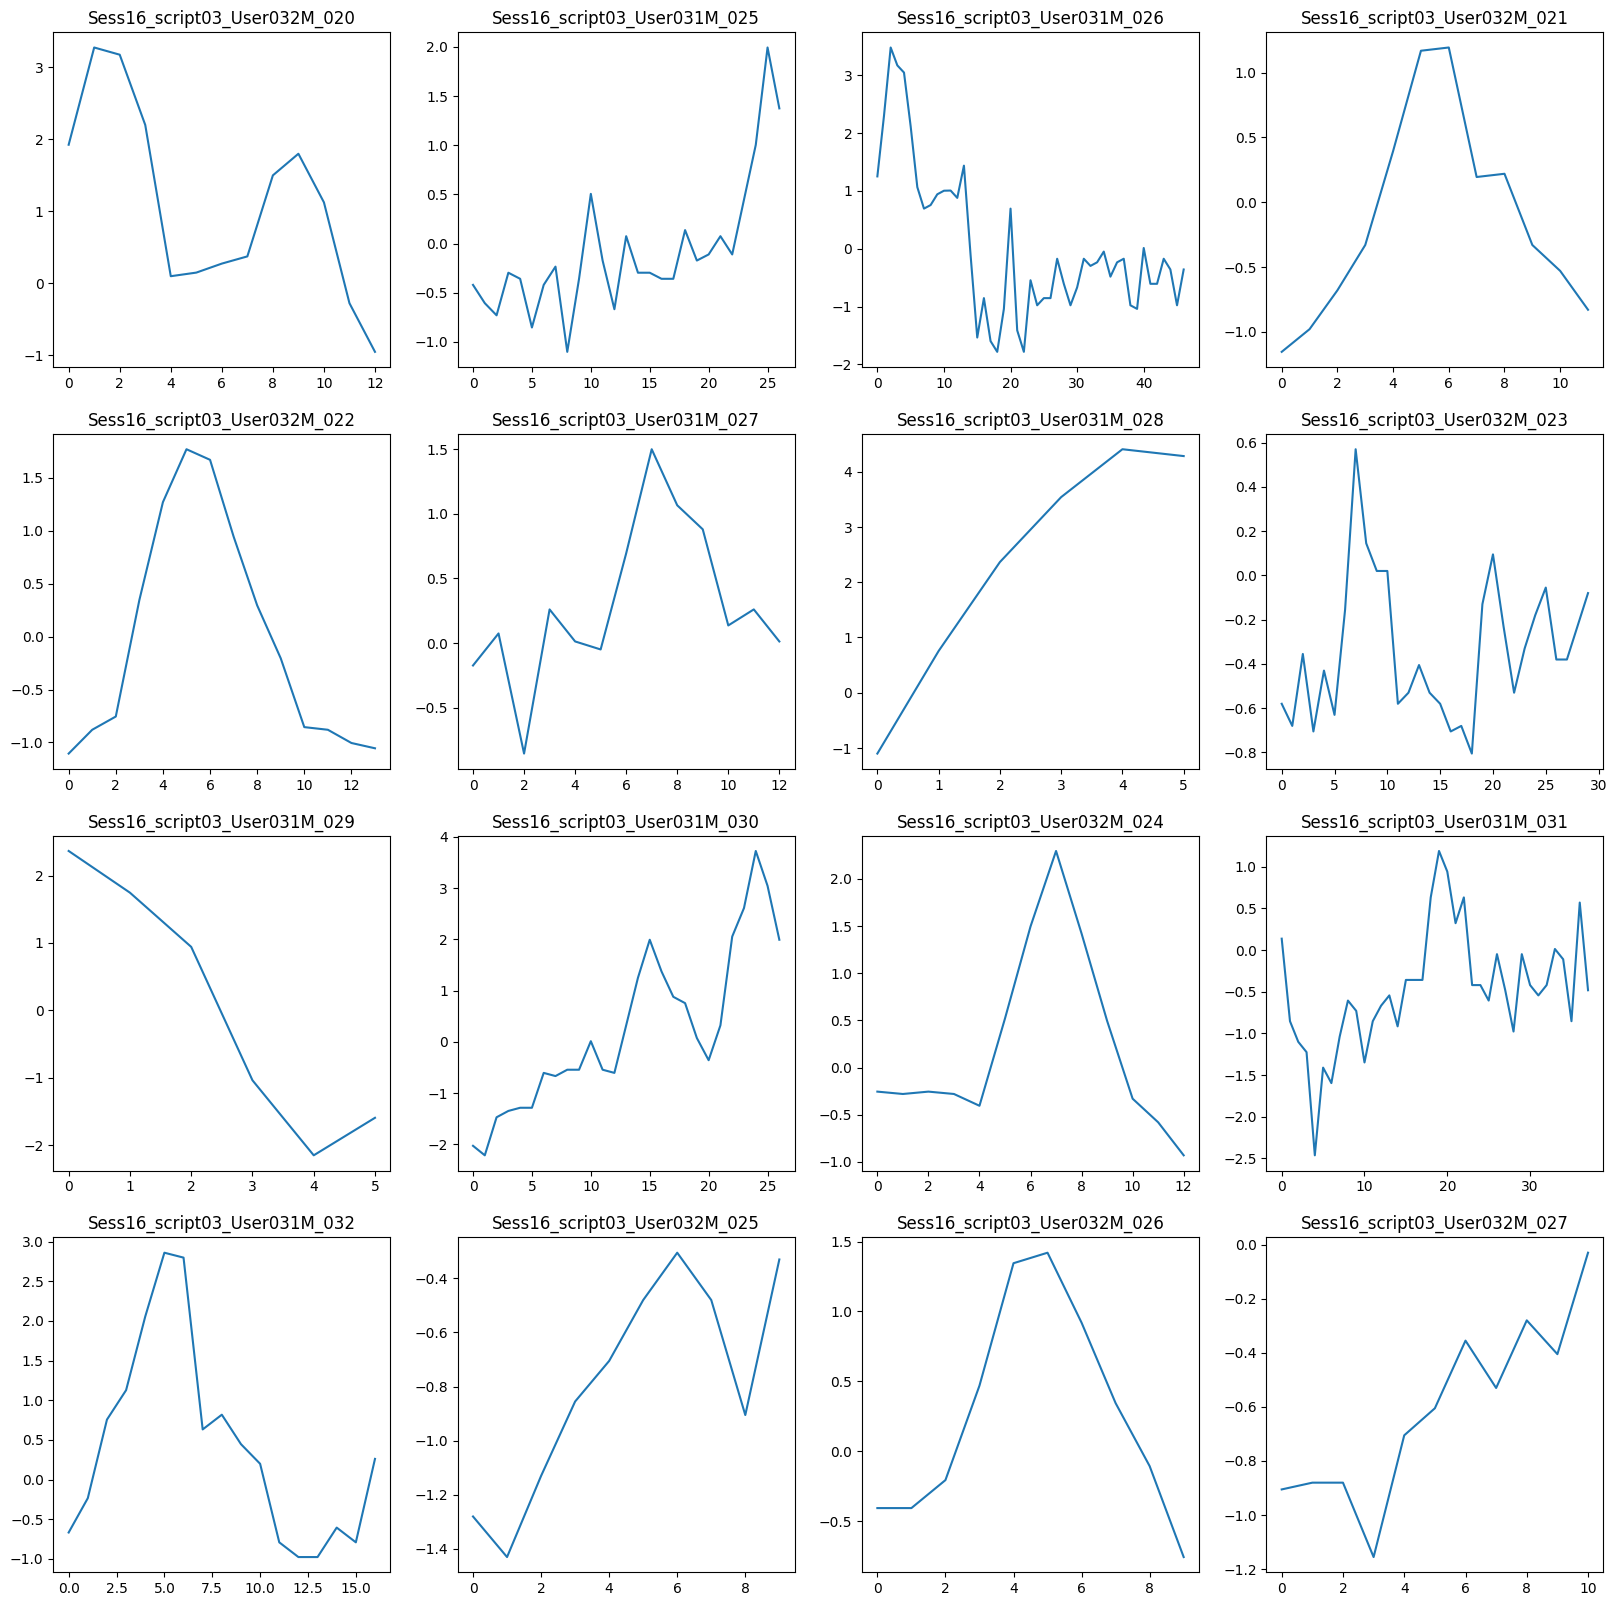

In [8]:
print("KEMDY20에서 ts가 결측되지 않은 annot 중 scaled된 EDA")

import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i in range(5000,5016):
    plt.subplot(4,4,i+1-5000)
    plt.title('{}'.format(annotation_20_nonmissing['Segment ID'][i]))
    plt.plot(annotation_20_nonmissing['Scaled EDA'][i])
plt.show()

KEMDY20에서 ts가 결측되지 않은 scaled된 TEMP


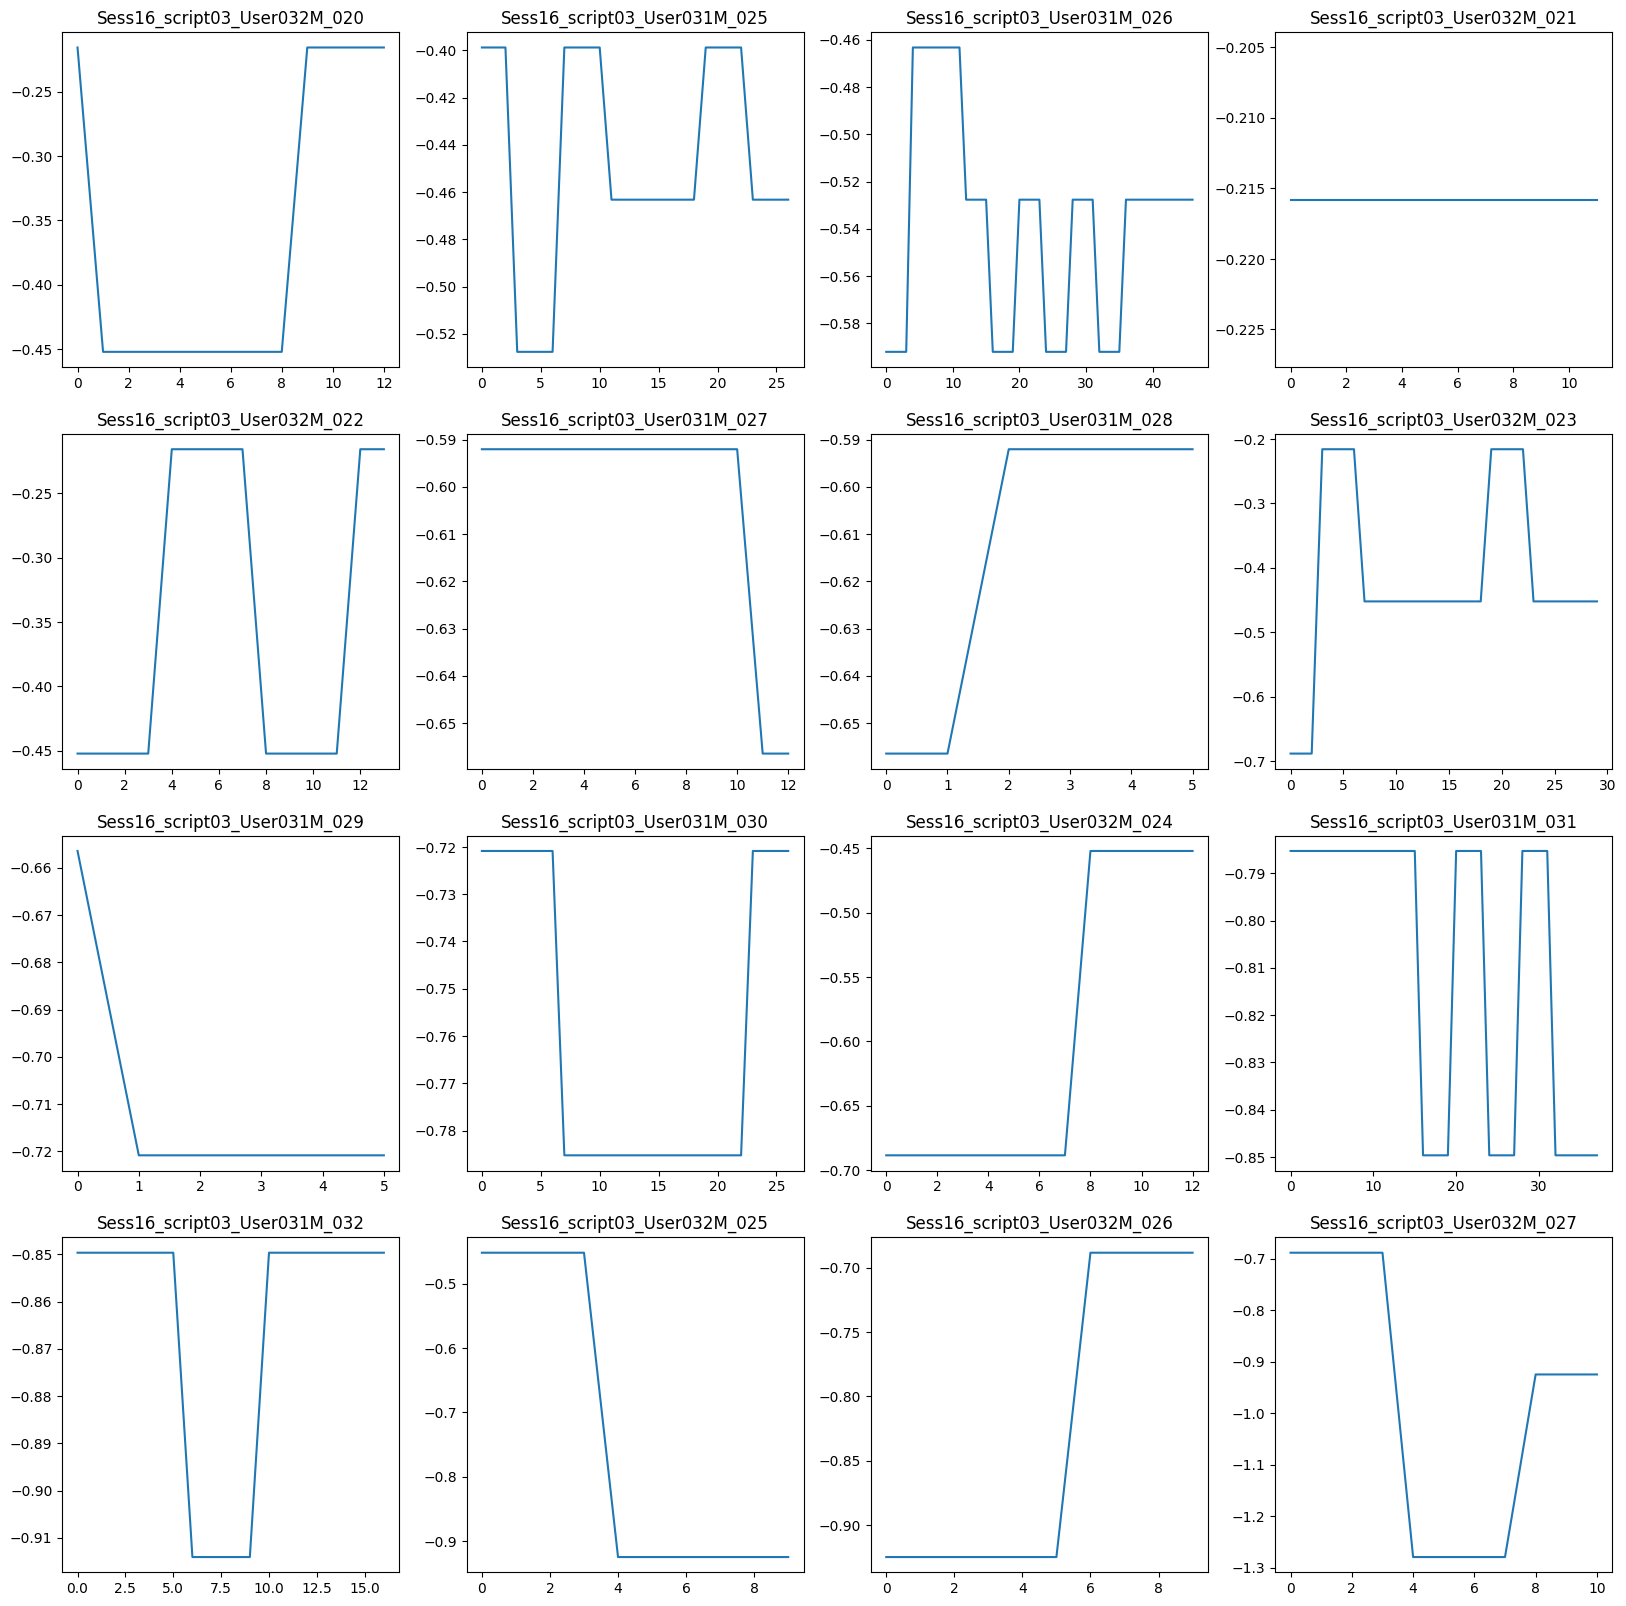

In [9]:
print("KEMDY20에서 ts가 결측되지 않은 scaled된 TEMP")

import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i in range(5000,5016):
    plt.subplot(4,4,i+1-5000)
    plt.title('{}'.format(annotation_20_nonmissing['Segment ID'][i]))
    plt.plot(annotation_20_nonmissing['Scaled TEMP'][i])
plt.show()

KEMDY20에서 ts가 결측되지 않은 annot 중 valence와 arousal의 jointplot


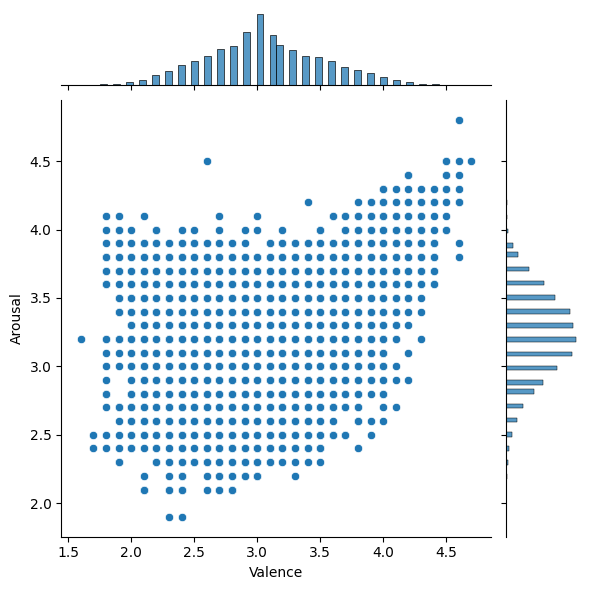

In [11]:
print("KEMDY20에서 ts가 결측되지 않은 annot 중 valence와 arousal의 jointplot")
import seaborn as sns

sns.jointplot(x = 'Valence', y='Arousal', data = annotation_20_nonmissing.iloc[single_target_index])

In [11]:
import random

seed = 42
random.seed(seed)
session_lst = list(annotation_20_nonmissing['Segment ID'].apply(lambda x: x[:6]).unique())
test_val_sess = random.sample(session_lst, k=16)
test_sess = test_val_sess[:8]
val_sess = test_val_sess[8:]
train_sess = [session for session in session_lst if session not in test_val_sess]


In [12]:
import pandas as pd
from tqdm import tqdm

train_annotation = pd.DataFrame([])

for session in tqdm(train_sess):
    for i, segment in enumerate(annotation_20_nonmissing['Segment ID']):
        if session in segment:
            train_annotation = train_annotation.append(annotation_20_nonmissing.iloc[i], ignore_index=True)
            

  0%|          | 0/22 [00:00<?, ?it/s]/tmp/ipykernel_2202569/1496268592.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_annotation = train_annotation.append(annotation_20_nonmissing.iloc[i], ignore_index=True)
100%|██████████| 22/22 [00:15<00:00,  1.42it/s]


In [13]:
def session_check(segment_id, sess):
    if sess in segment_id:
        return True
    
    else:
        return False

neutral_nums_dict = {}    

for session in train_sess:
    session_df = annotation_20_nonmissing[annotation_20_nonmissing['Segment ID'].apply(session_check, sess=session)]

    neutral_nums_dict[session] = len(session_df[session_df['Emotion'] == 'neutral'])

In [15]:
import numpy as np
num_20_neutral =  np.array(list(neutral_nums_dict.values())).sum()
neutral_proportion = (list(neutral_nums_dict.values())/num_20_neutral) 
session_neutral = 1332 * neutral_proportion
session_neutral = [int(round(x,0)) for x in session_neutral ]
dict(zip(train_sess, session_neutral))

{'Sess04': 62,
 'Sess05': 51,
 'Sess06': 64,
 'Sess10': 43,
 'Sess11': 55,
 'Sess13': 57,
 'Sess14': 58,
 'Sess19': 50,
 'Sess22': 45,
 'Sess23': 61,
 'Sess25': 84,
 'Sess27': 58,
 'Sess28': 45,
 'Sess29': 53,
 'Sess30': 45,
 'Sess32': 96,
 'Sess33': 69,
 'Sess34': 72,
 'Sess35': 50,
 'Sess36': 55,
 'Sess37': 64,
 'Sess40': 95}

In [ ]:
train_df = pd.DataFrame()

for sess, nums in zip(train_sess, session_neutral):

    sess_df = train_annotation[train_annotation['Segment ID'].apply(session_check, sess=sess)]
    neutral_df = sess_df[sess_df['Emotion'] == 'neutral']
    non_neutral_df = sess_df[sess_df['Emotion'] != 'neutral']
    train_df = train_df.append(non_neutral_df, ignore_index=True)
    
    index = list(neutral_df.index)
    sampling_nums = nums
    index= random.sample(index, k=sampling_nums)
    sampling_neutral_df = neutral_df.loc[index]
    train_df = train_df.append(sampling_neutral_df, ignore_index=True)


In [24]:
train_df_index = list(train_df.index)
random.shuffle(train_df_index)
train_df = train_df.loc[train_df_index]

,Segment ID,Emotion,Valence,Arousal,emotion_vector,valence_vector,arousal_vector,EDA,TEMP,EDA length,TEMP length,Scaled EDA,Scaled TEMP
1061,Sess22_script01_User044F_018,happy,3.9,2.9,"[4, 6, 0, 0, 0, 0, 0]","[0, 0, 2, 7, 1]","[0, 4, 3, 3, 0]","[-0.026909000000000294, -0.017939999999999845,...","[33.68, 33.68, 33.68, 33.68, 33.66, 33.66, 33....",30,30,"[-0.22897588943649919, -0.19060853727839874, -...","[-0.18359539558382346, -0.18359539558382346, -..."
2553,Sess37_script03_User073F_017,neutral,2.7,3.0,"[9, 0, 0, 0, 0, 1, 0]","[0, 3, 7, 0, 0]","[0, 2, 6, 2, 0]","[0.0025600000000000067, 0.0025600000000000067,...","[32.65, 32.65, 32.65, 32.65, 32.65, 32.65, 32....",24,24,"[-1.764507458839103, 1.4951342270578423, 0.993...","[0.03444376175083278, 0.03444376175083278, 0.0..."
1841,Sess30_script01_User059F_018,neutral,3.2,3.6,"[8, 2, 0, 0, 0, 0, 0]","[0, 1, 6, 3, 0]","[0, 0, 4, 6, 0]","[-0.005126000000000019, -0.0012809999999999766...","[30.51, 30.51, 30.51, 30.51, 30.51, 30.51, 30....",47,47,"[-0.07978450335568285, -0.05467541861067447, -...","[-0.06529177678398203, -0.06529177678398203, -..."
605,Sess13_script01_User026F_031,happy,4.4,3.9,"[3, 7, 0, 0, 0, 0, 0]","[0, 0, 0, 6, 4]","[0, 0, 2, 7, 1]","[-0.012814000000000103, -0.06663299999999994, ...","[33.73, 33.73, 33.71, 33.71, 33.71, 33.71, 33....",44,44,"[-2.19660027969257, -2.313398806709965, -2.009...","[0.25527279715166057, 0.25527279715166057, -0...."
567,Sess11_script05_User022M_017,neutral,2.9,2.9,"[7, 0, 0, 3, 0, 0, 0]","[0, 3, 5, 2, 0]","[0, 2, 7, 1, 0]","[-0.0038439999999999586, -0.014094999999999303...","[33.33, 33.33, 33.33, 33.34, 33.34, 33.34, 33....",9,9,"[-0.7145189149317015, -1.0406977565985345, -1....","[-0.6244346284605156, -0.6244346284605156, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,Sess11_script04_User021M_002,happy,4.6,3.8,"[0, 9, 0, 0, 0, 1, 0]","[0, 0, 1, 2, 7]","[0, 1, 3, 3, 3]","[-0.003843000000000041, -0.002563000000000093,...","[32.93, 32.93, 32.93, 32.93, 32.93, 32.93, 32....",22,22,"[-0.15779280736310664, 0.09119862198902394, 0....","[1.4613795854528493, 1.4613795854528493, 1.461..."
777,Sess13_script06_User026F_022,neutral,2.7,2.8,"[7, 0, 0, 0, 0, 3, 0]","[0, 4, 5, 1, 0]","[0, 3, 6, 1, 0]","[-0.0012810000000000876, -0.001282000000000005...","[34.81, 34.81, 34.83, 34.83, 34.83, 34.83, 34....",10,10,"[-0.45420975062233576, -0.8197696319311502, -0...","[-0.2162738256155424, -0.2162738256155424, 0.8..."
1130,Sess22_script06_User043F_013,angry;neutral,2.2,3.7,"[4, 0, 0, 2, 4, 0, 0]","[2, 5, 2, 1, 0]","[0, 0, 4, 5, 1]","[-0.0012810000000000876, 0.0025620000000000642...","[33.37, 33.37, 33.37, 33.37, 33.39, 33.39, 33....",51,51,"[-0.0057147149213324176, 0.7588559426612802, -...","[-0.3069844482245332, -0.3069844482245332, -0...."
1630,Sess28_script01_User055M_011,neutral,3.3,3.4,"[8, 2, 0, 0, 0, 0, 0]","[0, 0, 7, 3, 0]","[0, 0, 6, 4, 0]","[0.021761999999999837, 0.025602000000000125, 0...","[31.77, 31.73, 31.73, 31.73, 31.73, 31.77, 31....",20,20,"[0.44398466977537876, 0.6751640521437883, 0.86...","[0.9444616573912915, -1.670284159449034, -1.67..."


In [17]:
train_df['Emotion'].value_counts()

neutral                           1332
happy                              742
happy;neutral                      215
surprise                            82
angry                               78
sad                                 67
angry;neutral                       46
neutral;sad                         43
disgust                             36
neutral;surprise                    32
disgust;neutral                     25
fear                                24
fear;neutral                         9
happy;surprise                       3
fear;happy                           2
angry;disgust;neutral                2
angry;disgust                        2
disgust;neutral;sad                  1
angry;disgust;fear;neutral;sad       1
happy;sad                            1
happy;neutral;surprise               1
disgust;happy;neutral                1
fear;happy;neutral                   1
Name: Emotion, dtype: int64

In [30]:
val_df = pd.DataFrame()
for session in val_sess:
    df = annotation_20_nonmissing[annotation_20_nonmissing['Segment ID'].apply(session_check, sess=session)]
    val_df = val_df.append(df, ignore_index=True)

/tmp/ipykernel_2202569/3646993665.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  val_df = val_df.append(df, ignore_index=True)


In [31]:
test_df = pd.DataFrame()
for session in test_sess:
    df = annotation_20_nonmissing[annotation_20_nonmissing['Segment ID'].apply(session_check, sess=session)]
    test_df = test_df.append(df, ignore_index=True)

/tmp/ipykernel_2202569/984812727.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(df, ignore_index=True)


In [35]:
train_df, val_df, test_df

(                        Segment ID        Emotion  Valence  Arousal  \
 0     Sess04_script01_User008F_010          happy      3.8      3.6   
 1     Sess04_script01_User007M_009          happy      3.8      3.7   
 2     Sess04_script01_User007M_010  happy;neutral      3.9      3.3   
 3     Sess04_script01_User008F_012          happy      4.0      3.4   
 4     Sess04_script01_User007M_011          happy      4.2      3.9   
 ...                            ...            ...      ...      ...   
 2741  Sess40_script03_User080F_017        neutral      2.6      3.6   
 2742  Sess40_script05_User079F_033        neutral      3.7      3.3   
 2743  Sess40_script06_User080F_016        neutral      2.5      3.2   
 2744  Sess40_script04_User079F_036        neutral      2.1      3.5   
 2745  Sess40_script05_User080F_018        neutral      3.2      3.3   
 
               emotion_vector   valence_vector   arousal_vector  \
 0      [2, 8, 0, 0, 0, 0, 0]  [0, 0, 2, 8, 0]  [0, 1, 2, 7, 0]   


In [18]:
test_sess, val_sess

(['Sess08',
  'Sess02',
  'Sess20',
  'Sess18',
  'Sess16',
  'Sess09',
  'Sess07',
  'Sess24'],
 ['Sess26',
  'Sess31',
  'Sess38',
  'Sess03',
  'Sess21',
  'Sess15',
  'Sess39',
  'Sess01'])

In [38]:
target_index = train_df['Emotion'].value_counts().index
print('KEMDY20의 감정 종류',target_index, sep = '\n\n')
print('-'* 30)
target_dict = {1 : 0, 2 : 0, 3 : 0, 4:0, 5:0, 6:0, 7:0}
single_target_index = []
for i, emotion in enumerate(train_df['Emotion']):
    target_dict[emotion.count(';')+1] += 1
    if emotion.count(';') == 0:
        single_target_index.append(i)
    
print('KEMDY20의 멀티 타겟의 개수')
target_dict

KEMDY20의 감정 종류

Index(['neutral', 'happy', 'happy;neutral', 'surprise', 'angry', 'sad',
       'angry;neutral', 'neutral;sad', 'disgust', 'neutral;surprise',
       'disgust;neutral', 'fear', 'fear;neutral', 'happy;surprise',
       'fear;happy', 'angry;disgust;neutral', 'angry;disgust',
       'disgust;neutral;sad', 'angry;disgust;fear;neutral;sad', 'happy;sad',
       'happy;neutral;surprise', 'disgust;happy;neutral',
       'fear;happy;neutral'],
      dtype='object')
------------------------------
KEMDY20의 멀티 타겟의 개수


{1: 2361, 2: 378, 3: 6, 4: 0, 5: 1, 6: 0, 7: 0}

KEMDY20에 train_df의 valence와 arousal의 jointplot


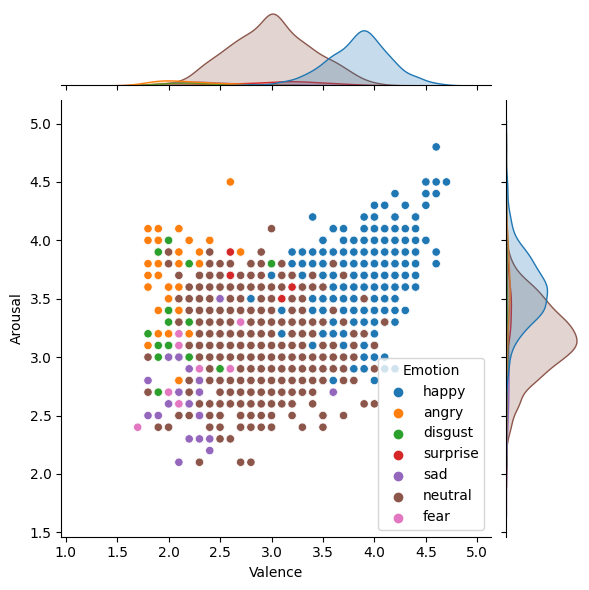

In [39]:
print("KEMDY20에 train_df의 valence와 arousal의 jointplot")
import seaborn as sns

sns.jointplot(x = 'Valence', y='Arousal', data = train_df.loc[single_target_index], hue='Emotion')

In [44]:
KEMDY20_dict={'train_df':[train_sess, train_df],'val_df':[val_sess, val_df], 'test_df':[test_sess, test_df]}

In [45]:
import pickle

with open('/home/arplab/project/paradeigma/multi_modal/model/data/paradeigma_KEMDY20_for_embedding.pkl', 'wb') as f:
    pickle.dump(KEMDY20_dict, f, pickle.HIGHEST_PROTOCOL)

In [1]:
import pickle
with open('/home/arplab/project/paradeigma/multi_modal/model/data/paradeigma_KEMDY20_for_embedding.pkl', 'rb') as f:
    KEMDY20_dict = pickle.load(f)

In [3]:
KEMDY20_dict['train_df'][1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Segment ID      2746 non-null   object 
 1   Emotion         2746 non-null   object 
 2   Valence         2746 non-null   float64
 3   Arousal         2746 non-null   float64
 4   emotion_vector  2746 non-null   object 
 5   valence_vector  2746 non-null   object 
 6   arousal_vector  2746 non-null   object 
 7   EDA             2746 non-null   object 
 8   TEMP            2746 non-null   object 
 9   EDA length      2746 non-null   int64  
 10  TEMP length     2746 non-null   int64  
 11  Scaled EDA      2746 non-null   object 
 12  Scaled TEMP     2746 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 279.0+ KB
